# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [4]:
import nltk
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

In [5]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [6]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | A premium price for a sub-p...
1,✅ Trip Verified | Really terrible user experi...
2,✅ Trip Verified | Very impressed with BA. Chec...
3,"✅ Trip Verified | LHR - SFO, LAS - LGW August..."
4,Not Verified | I flew from Malaga via LHR to...


In [7]:
df.to_csv("BA_reviews.csv", index=False)

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [8]:
df['reviews'] = df['reviews'].str.replace('✅ Trip Verified | ', '').str.replace('Not Verified | ', '').str.strip()
df.head()

,reviews
0,A premium price for a sub-par product - flew B...
1,Really terrible user experience. British Airwa...
2,Very impressed with BA. Check in online was a ...
3,"LHR - SFO, LAS - LGW August 2023 in Club World..."
4,I flew from Malaga via LHR to Boston on the 4t...


### Sentiment Analysis

In [9]:
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['sentiment'] = df['reviews'].apply(analyze_sentiment)
df.head()

,reviews,sentiment
0,A premium price for a sub-par product - flew B...,-0.122222
1,Really terrible user experience. British Airwa...,-0.050000
2,Very impressed with BA. Check in online was a ...,0.282548
3,"LHR - SFO, LAS - LGW August 2023 in Club World...",0.081407
4,I flew from Malaga via LHR to Boston on the 4t...,-0.060417


In [10]:
def classify_sentiment(score):
    if score > 0:
        return 'Good'
    elif score < 0:
        return 'Bad'
    else:
        return 'Mid'

df['sentiment_class'] = df['sentiment'].apply(classify_sentiment)
df.head()

,reviews,sentiment,sentiment_class
0,A premium price for a sub-par product - flew B...,-0.122222,Bad
1,Really terrible user experience. British Airwa...,-0.050000,Bad
2,Very impressed with BA. Check in online was a ...,0.282548,Good
3,"LHR - SFO, LAS - LGW August 2023 in Club World...",0.081407,Good
4,I flew from Malaga via LHR to Boston on the 4t...,-0.060417,Bad


In [11]:
df['sentiment_class'].value_counts()

sentiment_class
Good    627
Bad     363
Mid      10
Name: count, dtype: int64

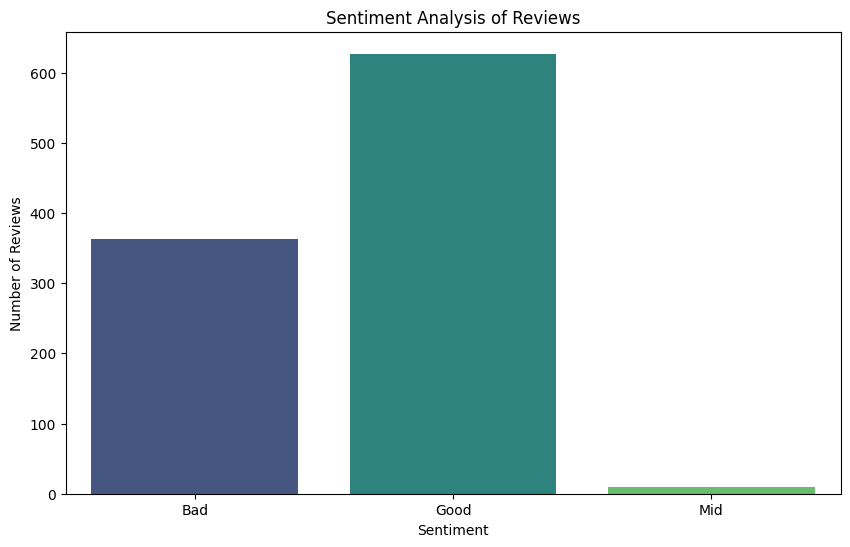

In [12]:
# Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_class', data=df, palette='viridis')
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

In [13]:
df.to_csv("BA_reviews_sentiment.csv", index=False)

### Extract Key Topics

In [14]:
def extract_keywords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    # Filter out stop words and punctuation
    keywords = [word for word in word_tokens if word.isalnum() and word.lower() not in stop_words]
    return keywords

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
df['keywords'] = df['reviews'].apply(extract_keywords)

all_keywords = [keyword for keywords in df['keywords'] for keyword in keywords]
keyword_freq = Counter(all_keywords)

keyword_freq_df = pd.DataFrame(list(keyword_freq.items()), columns=['Keyword', 'Frequency'])

top_keywords = keyword_freq_df.sort_values(by='Frequency', ascending=False).head(20)

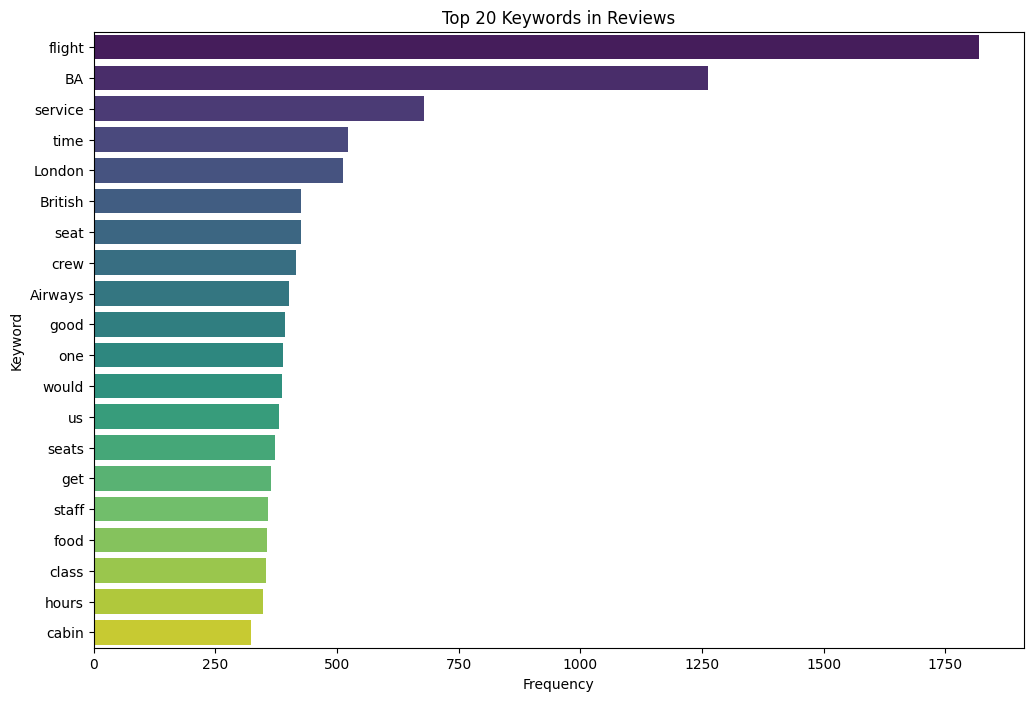

In [16]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Keyword', data=top_keywords, palette='viridis')
plt.title('Top 20 Keywords in Reviews')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()